<a href="https://colab.research.google.com/github/grandfatherr/grandfatherr/blob/main/Edwin_Mutuma_Week_2_Core_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1.0 Defining the Question

##a) Specifying the question

The data analytic question is to predict which individuals are most likely to have or use a bank account

##b) Defining the metric for success

Since it is increasingly difficult to achieve 100% accuracy for our predictive model, we will term it quite successful if we achieved an accuracy level above 85% 

##c) Understanding the context

According to The World Bank, Financial inclusion means that individuals and businesses have access to useful and affordable financial products and services that meet their needs – transactions, payments, savings, credit and insurance – delivered in a responsible and sustainable way. 

Access to bank accounts is an indicator of financial inclusion. As such, we want to create a predictive model that will predict bank account ownership. This will enable us to increase the rate of financial inclusion.

##d) Recording the Experimental Design

##e) Data relevance

country	- Country interviewee is in.

year- Year survey conducted

uniqueid	Unique identifier for each interviewee

Location type	- Type of location: Rural, Urban

Cellphone_access - If interviewee has access to a cellphone: Yes, No

household_size -	Number of people living in one house

Age_of_respondent	 - The age of the interviewee

Gender_of_respondent -	Gender of interviewee: Male, Female

Relationship_with_head	- The interviewee’s relationship with the head 
of the family

Marital_status -	The martial status of the interviewee:

Education_level -	Highest level of education

Job_type -	Type of job interviewee has

#2.0 Reading various libraries

There are a couple of libraries we are going to use in our Exploratory Data Analysis. The Pandas library will be useful in data manipulation and data analysis. Numpy is going to be used with arrays and mathematical functions for the arrays. Matplotlib is a data visualization and graphical plotting library for Python. Seaborn is based on matplotlib and is useful in creating attractive visualizations.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#3.0 Reading our data

In order to work with our data, we are going to read it into our notebook. To do that, we are going to use the pandas read_csv function that is used to read the file and create a dataframe.

In [2]:
df = pd.read_csv('http://bit.ly/FinancialDataset')

Let's read the description of our data

In [3]:
df2 = pd.read_csv("http://bit.ly/VariableDefinitions")

#4.0 Looking into our dataset

In [4]:
# Let's take a closer look at the first five rows of our dataset

df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [5]:
# Let's take a closer look at the data description

df2.head(15)

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


In [6]:
# Let's take a look at the bottom part of our dataset

df.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [7]:
# Generate and view a random sample of our dataset

df.sample(5)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
8843,Rwanda,2016,uniqueid_2776,No,Rural,Yes,2.0,41.0,Female,Spouse,Married/Living together,Primary education,Farming and Fishing
15627,Tanzania,2017,uniqueid_825,No,Urban,Yes,1.0,42.0,Female,Head of Household,Widowed,Primary education,Self employed
5015,Kenya,2018,uniqueid_5016,No,Urban,Yes,5.0,30.0,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
14150,Rwanda,2016,uniqueid_8083,No,Urban,Yes,1.0,32.0,Male,Head of Household,Single/Never Married,Tertiary education,Farming and Fishing
8447,Rwanda,2016,uniqueid_2380,No,Rural,Yes,2.0,68.0,Female,Head of Household,Widowed,No formal education,Farming and Fishing


In [8]:
# Check how many entries there are in our dataset

print('We have '+ str(df.shape[0]) + ' rows, and ' + str(df.shape[1]) + ' columns in our dataset')

We have 23524 rows, and 13 columns in our dataset


In [9]:
# Let's look at the columns that we have in our dataset

df.columns

Index(['country', 'year', 'uniqueid', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

In [10]:
# Let us look at the data types we will work with in our dataset

df.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

#5.0  External Data Source Validation

#6.0 Cleaning the dataset

As we work as data scientist, we will encounter a lot of data that is untidy or not clean.. This will call for us to clean our data so as to be able to manipulate and work with our data. Data cleansing is the process in which we go through all of the data within a database and either remove or update information that is incomplete, incorrect, improperly formatted, duplicated, or irrelevant

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


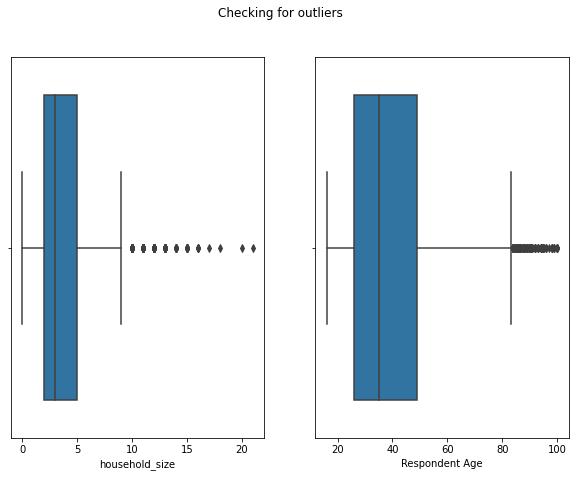

In [11]:
# Checking for outliers

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10, 7))
fig.suptitle('Checking for outliers')
sns.boxplot(df['household_size'], ax=ax1)
sns.boxplot(df['Respondent Age'], ax=ax2)
plt.show()

##6.1 Consistency

In [12]:
# Checking for consistency

df.duplicated().any()

False

##6.2 Validity

In [13]:
# Let's drop all the unnecessary columns in our dataset

df = df.drop(columns=['uniqueid', 'The relathip with head'])

##6.3 Completeness

In [14]:
# Checking for missing data

df.isnull().sum()

country                 14
year                     0
Has a Bank account      36
Type of Location        15
Cell Phone Access       11
household_size          28
Respondent Age          34
gender_of_respondent    34
marital_status          32
Level of Educuation     29
Type of Job             30
dtype: int64

In [15]:
# Dealing with the missing data

df.dropna(inplace=True)

##6.4 Uniformity

In [16]:
# Rename the misspelt columns

df.rename(columns={'Level of Educuation':'Level of Education'},inplace=True)
df.head(3)

,country,year,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,marital_status,Level of Education,Type of Job
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Single/Never Married,Vocational/Specialised training,Self employed


In [17]:
# Make the columns uniform

df.columns = df.columns.str.replace(' ', '_')
df.head(3)

,country,year,Has_a_Bank_account,Type_of_Location,Cell_Phone_Access,household_size,Respondent_Age,gender_of_respondent,marital_status,Level_of_Education,Type_of_Job
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Single/Never Married,Vocational/Specialised training,Self employed


In [18]:
df.drop(df[df['year'] > 2018].index, inplace=True)
df

,country,year,Has_a_Bank_account,Type_of_Location,Cell_Phone_Access,household_size,Respondent_Age,gender_of_respondent,marital_status,Level_of_Education,Type_of_Job
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5.0,34.0,Female,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8.0,26.0,Male,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,No,Rural,Yes,4.0,48.0,Female,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,No,Rural,Yes,2.0,27.0,Female,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,No,Rural,Yes,5.0,27.0,Female,Widowed,Primary education,Other Income
23522,Uganda,2018,No,Urban,Yes,7.0,30.0,Female,Divorced/Seperated,Secondary education,Self employed


#7.0 Exploratory Data Analysis

Exploratory Data Analysis refers to the process of performing investigations on a dataset so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations

##7.1 Univariate analysis

###a) Univariate analysis plots

Let us look at the different frequency tables for our dataset 

In [19]:
# Let us look at the frequency table for our gender column

df.gender_of_respondent.value_counts().to_frame()

,gender_of_respondent
Female,13766
Male,9574


In [20]:
# Let us look at the frequency table for our country column

df.country.value_counts().to_frame()

,country
Rwanda,8683
Tanzania,6500
Kenya,6062
Uganda,2095


In [21]:
# Let us look at the frequency table for bank accounts holders

df.Has_a_Bank_account.value_counts().to_frame()

,Has_a_Bank_account
No,20044
Yes,3296


In [22]:
# Let us look at the frequency table for locations

df.Type_of_Location.value_counts().to_frame()

,Type_of_Location
Rural,14263
Urban,9077


In [23]:
# Let us look at the frequency table for bank accounts holders

df.Has_a_Bank_account.value_counts().to_frame()

,Has_a_Bank_account
No,20044
Yes,3296


In [24]:
# Let us look at the frequency table for education levels

df.Level_of_Education.value_counts().to_frame()

,Level_of_Education
Primary education,12688
No formal education,4467
Secondary education,4206
Tertiary education,1143
Vocational/Specialised training,801
6,27
Other/Dont know/RTA,8


In [25]:
# Let us look at the frequency table for the ages of our respondents

df.Respondent_Age.value_counts().to_frame()

,Respondent_Age
30.0,1043
35.0,831
25.0,785
28.0,742
32.0,707
...,...
100.0,5
93.0,4
96.0,3
99.0,2


Let us come up with pie charts for different variables


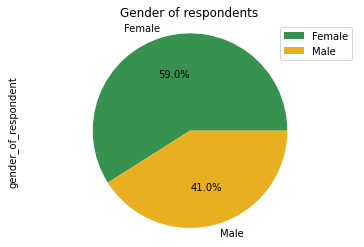

In [26]:
# Create  a pie chart of gender distribution

df['gender_of_respondent'].value_counts().plot(kind='pie',colors=['#37914f','#e8b020'], autopct='%0.1f%%')
fig=plt.gcf()
plt.axis('equal')
plt.legend(loc='upper right')
plt.title('Gender of respondents')
plt.show()

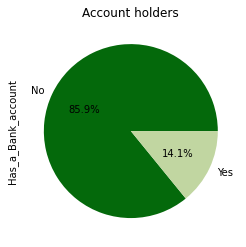

In [27]:
# Lets create a pie chart for the bank account holders

df['Has_a_Bank_account'].value_counts().plot(kind='pie',colors=['#04690b','#c1d6a1'], autopct='%0.1f%%')
plt.title('Account holders')
plt.show()

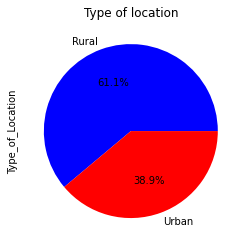

In [28]:
# Visualizing the pie chart for types of location
df['Type_of_Location'].value_counts().plot(kind='pie',colors=['Blue','red'], autopct='%0.1f%%')
plt.title('Type of location')
plt.show()

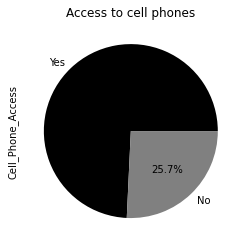

In [29]:
# Pie chart of cell phone access 
df['Cell_Phone_Access'].value_counts().plot(kind='pie',colors=['Black','gray'], autopct='%0.1f%%')
plt.title('Access to cell phones')
plt.show()

Histograms for our different variables.

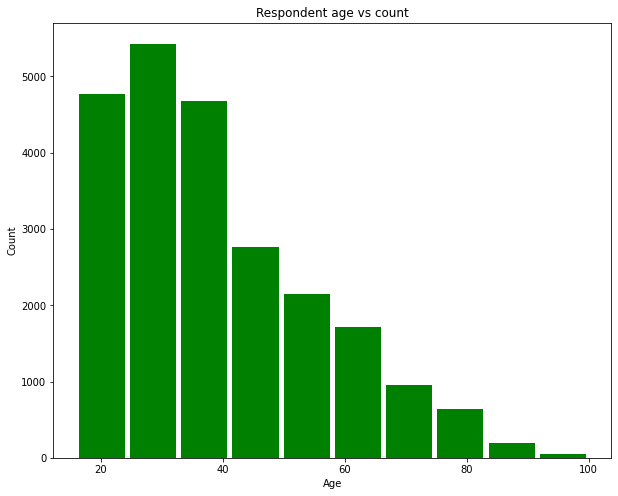

In [30]:
# Histogram of respondents' age

age = df['Respondent_Age']
fig=plt.figure(figsize=(10,8))
plt.hist(age, histtype='bar', color='green', rwidth=0.9)
plt.title("Respondent age vs count")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

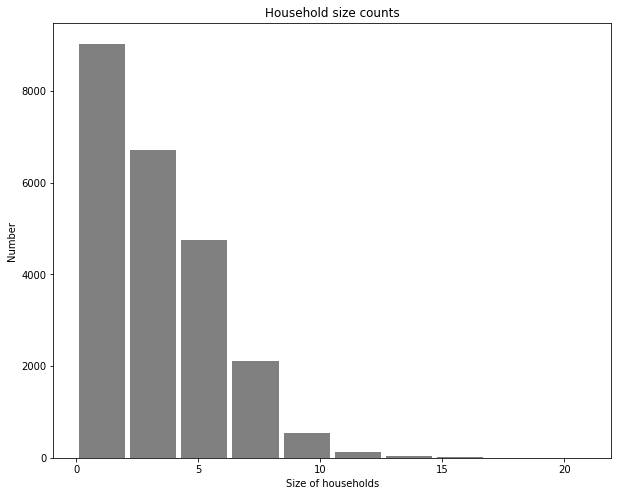

In [31]:
# Household histogram

household_size = df['household_size']
fig=plt.figure(figsize=(10,8))
plt.hist(household_size, histtype='bar', color='gray', rwidth=0.9)
plt.title("Household size counts")
plt.xlabel("Size of households")
plt.ylabel("Number")
plt.show()

###b) Measures of Central Tendency

A measure of central tendency is a single value that attempts to describe a set of data by identifying the central position within that set of data. Let's go and look at the various measures of central tendency for our data

Let's look at the measures of central tendency for the household size column

In [32]:
# Looking at the average number of people per household

df.household_size.mean()

3.688560411311054

In [33]:
# Let's see the median for the household

df.household_size.median()

3.0

In [34]:
# Looking at the mode of our household size

df.household_size.mode()

0    2.0
dtype: float64

Let's look at the measures of central tendency for the respondents' ages column

In [35]:
# The Mean ages for our respondents

df['Respondent_Age'].mean()

38.80706940874036

In [36]:
# The median age for the respondents

df['Respondent_Age'].median()

35.0

In [37]:
# Find the mode age  

df['Respondent_Age'].mode()

0    30.0
dtype: float64

###c) Measures of dispersion

Standard deviation

In [38]:
# standard deviation for the household size

df.household_size.std()

2.2812745975350435

In [39]:
# standard deviation for the respondent age

df.Respondent_Age.std()

16.519904564514412

Quantiles

In [40]:
df.household_size.quantile([0.25, 0.5, 0.75])

0.25    2.0
0.50    3.0
0.75    5.0
Name: household_size, dtype: float64

In [41]:
df.Respondent_Age.quantile([0.25, 0.5, 0.75])

0.25    26.0
0.50    35.0
0.75    49.0
Name: Respondent_Age, dtype: float64

Skewness

For positive skewness we expect to find that the mean is greater than the median which is greater than the mode and vice versa is true

Mean > Median > Mode shows a positive skew

Mean < Median < Mode shows a negative skew in our data

In [42]:
df.household_size.skew()

0.9741827150450616

In [43]:
df.Respondent_Age.skew()

0.8406145812311228

Kurtosis

In [44]:
#

df.household_size.kurt()

1.1538357462528523

In [45]:
#

df.Respondent_Age.kurt()

0.09826807013177241

Variance

In [46]:
# Checking the variance for the household size

df.household_size.var()

5.204213789358675

In [47]:
# Checking the variance for the ages of the respondents

df.household_size.var()

5.204213789358675

Range

In [48]:
# Checking the range of our household sizes

Range = df.household_size.max()-df.household_size.min()
print('The range for the household size is, ', Range)

The range for the household size is,  21.0


In [49]:
# Checking the range of the respondent ages

Range = df.Respondent_Age.max()-df.Respondent_Age.min()
print('The range for ages is, ', Range)

The range for ages is,  84.0


##7.2 Bivariate Analysis

###7.2.1 Numerical vs Numerical

In [50]:
# Previewing our dataset

df.head(3)

,country,year,Has_a_Bank_account,Type_of_Location,Cell_Phone_Access,household_size,Respondent_Age,gender_of_respondent,marital_status,Level_of_Education,Type_of_Job
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Single/Never Married,Vocational/Specialised training,Self employed


In [51]:
# Let us check whether there exists a correlation between household size and the respondents age

df.Respondent_Age.corr(df.household_size)

-0.11967115234154871

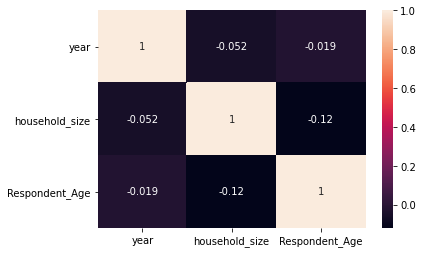

In [52]:
sns.heatmap(df.corr(),annot=True)

###7.2.2 Categorical Vs Categorical

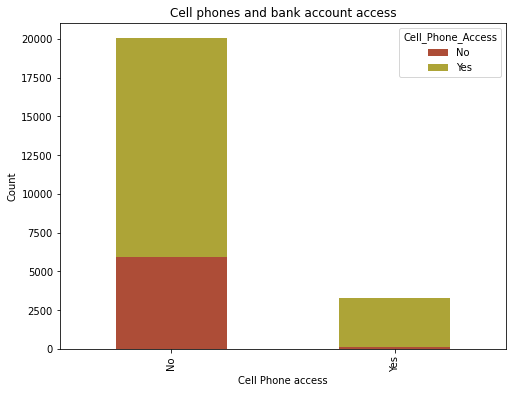

In [53]:
# The number of cell phone users with bank accounts

pd.crosstab(df['Has_a_Bank_account'], df['Cell_Phone_Access']).plot(kind='bar', color=('#ad4d37','#ada437'), figsize=(8, 6), stacked=True)
plt.xlabel('Cell Phone access')
plt.ylabel('Count')
plt.title('Cell phones and bank account access')
plt.show()

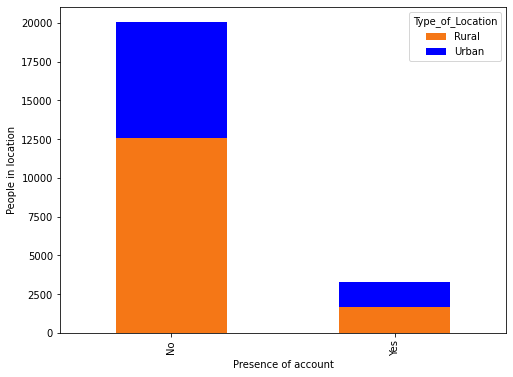

In [54]:
# Create a stacked column to view location and bank accounts

pd.crosstab(df['Has_a_Bank_account'], df['Type_of_Location']).plot(kind='bar', color=('#f57716', 'blue'), figsize=(8, 6), stacked=True)
plt.xlabel('Presence of account')
plt.ylabel('People in location')
plt.show()

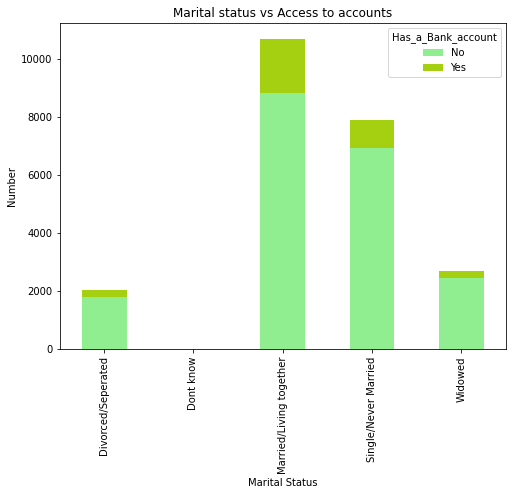

In [55]:
pd.crosstab(df['marital_status'], df['Has_a_Bank_account']).plot(kind='bar', color=('lightgreen', '#a5cf11'), figsize=(8, 6), stacked=True)
plt.xlabel('Marital Status')
plt.ylabel('Number')
plt.title('Marital status vs Access to accounts')
plt.show()

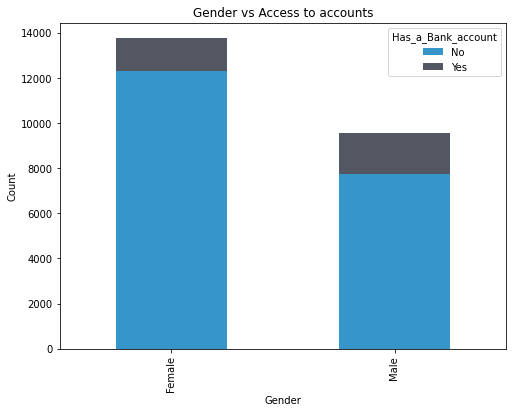

In [56]:
pd.crosstab(df['gender_of_respondent'], df['Has_a_Bank_account']).plot(kind='bar', color=('#3696c9', '#535761'), figsize=(8, 6), stacked=True)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender vs Access to accounts')
plt.show()

###7.2.3 Categorical vs Numerical

Calculating the z-scores

In [57]:
from scipy import stats

# Calculating the z - score for household size

stats.zscore(df.household_size)

array([-0.30183791,  0.57488374,  0.57488374, ...,  0.57488374,
        1.4516054 ,  2.76668789])

In [58]:
# Calculating the z - score for Respondent age

stats.zscore(df.Respondent_Age)

array([-0.89633609,  1.88824328, -0.77526742, ..., -0.71473308,
       -0.53313008, -1.13847342])

##7.3 Multivariate Analysis

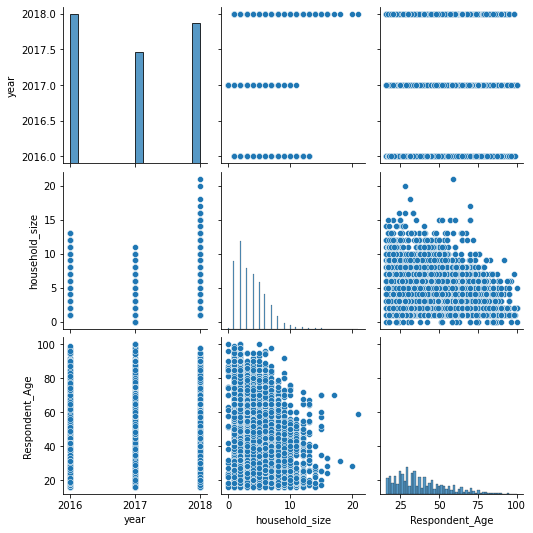

In [59]:
sns.pairplot(df)
plt.show()

###7.3.1 Principal Component Analysis

In [60]:
df.head(2)

,country,year,Has_a_Bank_account,Type_of_Location,Cell_Phone_Access,household_size,Respondent_Age,gender_of_respondent,marital_status,Level_of_Education,Type_of_Job
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Widowed,No formal education,Government Dependent


In [61]:
# Let's divide the dataset into a feature set and corresponding labels.

X = df.drop(['country', 'year', 'Has_a_Bank_account', 'Type_of_Location', 'Cell_Phone_Access', 'gender_of_respondent', 'marital_status', 'Level_of_Education', 'Type_of_Job'], axis=1)

y = df[['Has_a_Bank_account']]

In [62]:
# Under preprocessing step, we  create a Training set and Test set by splitting our dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [63]:
# Normalization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [64]:
# Applying PCA

from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [65]:
# Explained variance Ratio

explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.55968711, 0.44031289])

In [66]:
# Train our algorithm by using 1 principal component

from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [67]:
# Training and Making Predictions

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [68]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.multioutput import MultiOutputClassifier

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

[[4036    0]
 [ 632    0]]
Accuracy 0.8646101113967438


#8.0 Implementing the solution

In [69]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.multioutput import MultiOutputClassifier

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

[[4036    0]
 [ 632    0]]
Accuracy 0.8646101113967438


#9.0 Challenging the solution

#10 Follow up questions

###a) Do we have the right data

The data we had was right. Right' data to start with is data that would fit your eventual purpose. And the data we were using in our analysis achieved its purpose.

###b) Do we need other data to answer our question?

Yes. The dataset we had didn't give us as much insight as we'd hoped it would especially when doing our univariate and bivariate analysis.

Consequently, additional data would have been better in achieving more accurate  results. 

Having more data enables us to reduce our reliance on assumptions and weak correlations. Presence of more data results in better and accurate models.